# Linear SVM Classification

### Hard Margin Classification
- Essentially want a the largest street that separates two classes from each other, where this is called large margin classification
- Support vectors are the points on the edge of the streets, or the extremes of the classifications that are closest to the other class
- In SVM, feature scaling is important because it allows for a more distinct and wider large margin classification to occur
- Issues withn this is that it only works n data that is linearly seperable and it is sensitive to outliers

### Soft Margin Classification
- Can find a good balance between finding the largest margin and allowing the limit of margin violation (The points that are allowed on the street)
- Hyperparameter C is the regularization parameter, where if it goes down, then the stree width increases
- C can decrease overfitting of the data by allowing more instances to act as the support vectors, but allows for more margin violations


In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values #The values that we want to test against
y = (iris.target == 2) #The virginica iris

In [3]:
svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)

svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]] #Testing svm_clf to make predictions
svm_clf.predict(X_new)

array([ True, False])

In [5]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

- Decision function here is not the same as LogisticRegressions proba method where it gives you the probability that an instance belongs to a certain class
- The use of SVC instead of Linear SVM will allow for the mapping of the decision funcion to the same proba method where it tells you the probability that an instanc ebelongs to a certain class

### Nonlinear SVM Classification
- Just like before, you can approach this by adding polynomial features

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3), #Adding polynomial features
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

### Polynomial Kernel

- No need to actually add polynomial features, can use a kernel that makes the model act as if it has polynomial features and is better

In [7]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

- The coef0 and degree hyperparameters determine the degree of overfitting and underfitting and how well it fits. Coef0 controls how much the model is influenced by jigh degree terms

### Similarity Features

- Can choose a landmark and then calculate the similarity of instances to that landmark
- Create a landmark at each and every instance of the dataset
    - Chances of the transformed dataset are linearly seperable
- Training set becomes very large


### Gaussian RBF kernel

- Hyperparamter gamma acts as a regularization parameter
- Increasing this reduces the influence that individual instances have, meaning that the biundary decision ends up being smaller and more iregular
- If model is overfit, reduce gamma and vice versa. Similar for the C hyperparameter

In [8]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf",
        gamma=5,
        C=0.001)
)

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

- As a side not, there are different types of kernels that are optimized for different data structures and types

### SVM Classes and Computational COmplexity
- Linear SVC uses an optimization algorithm and doesnt support the kernel trick. Algorithm takes long if high precision is required
- SVC class supports the kernel trick but doesnt scale well with larger datasets. This is optimal only for small and medium nonlinear training sets. Scales well with nymber of featureswhen they are sparse.
- SGD Classifier performs large margin classification using stochastic gradient descent as its algorithm. As a result, it scales well with larger datasets by training incrementally. Can be used for out of core learning. 

### SVM Regression 

- The goal in this one is to have as many support vectors as possible, not to have the widest street
- Epsilon sensitivity is when you add more training instances in the margin, the models predictions are not affected
- Reducing epsilon increases the support vectors and regularizes the model

In [9]:
import numpy as np
from sklearn.svm import LinearSVR #Linear Version


np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [10]:
import numpy as np
from sklearn.svm import SVR #Quadratic dataset using poly and the degree

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

# Questions
1. The idea behind support vector machines is that there is a street that can separate two distinct classes. This is called large margin classificiation. There is hard margin and soft margin classification, where hard margin ensures that no instances are placed within the street and soft margin allows for the violation of this rule
2. A support vector are instances in the training set that are on the line of the street that separates the two classes. More so, they have influence over the model compared to the other instances as they determine the boundary decision
3. Its important to scale things when using SVM because it will be easier to create a large margin classification that distinguishes between the two classes. If not scaled, it will neglect smaller features
4. Using the decision_function method gives the confidence scorres when it classifies. It can give the probability if SVC function is used, which will map the decision function output to a probability
5. The use cases are based on the size of the dataset. LinearSVC and SVC dont scale too well with large amounts of data due to the time complexity and the training algorithm being an optimization algorithm. On the other hand, the SGD classifier uses stochastic gradient descvent which is an incremental training algorithm. As a result, it performs well with a lot of data and can be trained off line. Some also support the kernel trick which can be quite simple, and others may be faster than one another. 
6. If using an SVM classifier with an RBF kernel and it seems to udn erfit the training data you should increase gamma so that it decreasesthe regularization. Additionally, you should also increase C.
7. When a model is epsilon sensitive this means that if you add more instances into the margin the model wont be affected by these instances when training or trying to fit a regression SVM
8. The kernel trick is used when you dont want to transform the dataset into a higher dimensional features. This will allow you to train non linear data on a linear svc while having the same outputs as if you added polynomial features to the data. 
9. Train a linearsvc on linearly seperable dataset, then train svc and sgd classifier on the same set

In [11]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

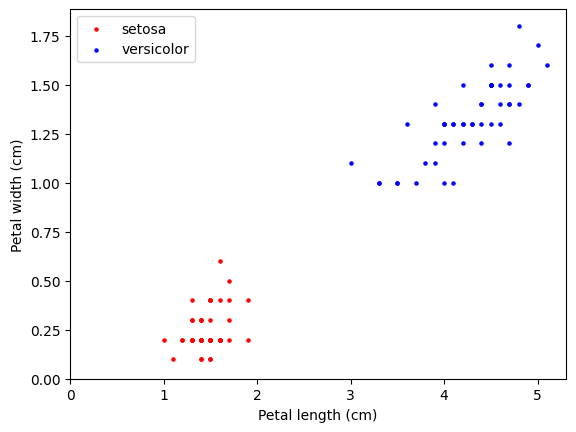

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0][y==0], X[:,1][y==0], s=5, c='r', label="setosa")
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=5, c='b', label="versicolor")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.show()

In [13]:
#Making pipelines
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

lsvc_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42)
)

In [14]:
lsvc_clf.fit(X, y)
lsvc = lsvc_clf.named_steps['linearsvc']
lsvc.coef_[0, 0]/lsvc.coef_[0, 1], lsvc.intercept_/lsvc.coef_[0, 1]

(1.0790083653265377, array([0.31254643]))

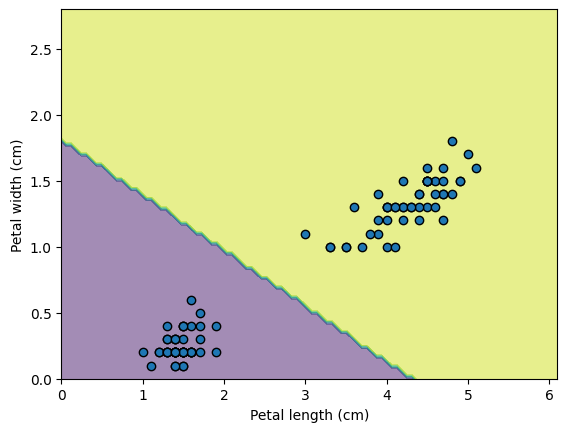

In [15]:
#Plotting decision boundary for lsvc
from sklearn.inspection import DecisionBoundaryDisplay

disp_lsvc = DecisionBoundaryDisplay.from_estimator(
    lsvc_clf, X, response_method="predict",
    xlabel="Petal length (cm)", ylabel="Petal width (cm)",
    alpha=0.5,
)


disp_lsvc.ax_.scatter(X[:, 0], X[:, 1], edgecolor="k")
plt.xlim(0)
plt.ylim(0)
plt.show()

In [16]:
svc_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear", random_state=42)
)

In [17]:
svc_clf.fit(X, y)
svc = svc_clf.named_steps['svc']
svc.coef_[0, 0]/svc.coef_[0, 1], svc.intercept_/svc.coef_[0, 1]

(1.1012668501632903, array([0.33966501]))

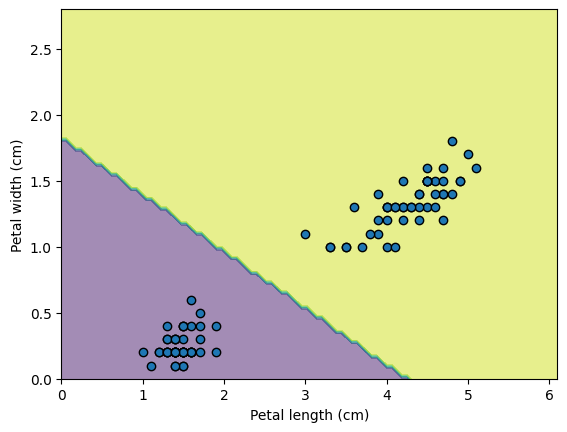

In [18]:
disp_svc = DecisionBoundaryDisplay.from_estimator(
    svc_clf, X, response_method="predict",
    xlabel="Petal length (cm)", ylabel="Petal width (cm)",
    alpha=0.5,
)

disp_svc.ax_.scatter(X[:, 0], X[:, 1], edgecolor="k")
plt.xlim(0)
plt.ylim(0)
plt.show()

In [19]:
sgd_clf = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss='hinge', penalty='l2', alpha=0.0007, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=42, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
)

In [20]:
sgd_clf.fit(X, y)
sgd = sgd_clf.named_steps['sgdclassifier']
sgd.coef_[0, 0]/sgd.coef_[0, 1], sgd.intercept_/sgd.coef_[0, 1]

(0.9963654337926439, array([0.30312867]))

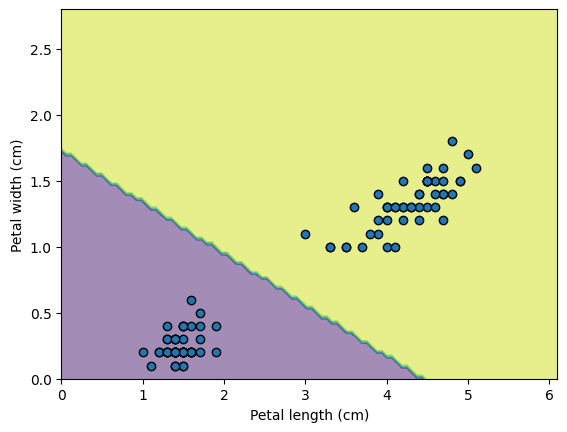

In [21]:
disp_sgd = DecisionBoundaryDisplay.from_estimator(
    sgd_clf, X, response_method="predict",
    xlabel="Petal length (cm)", ylabel="Petal width (cm)",
    alpha=0.5,
)

disp_sgd.ax_.scatter(X[:, 0], X[:, 1], edgecolor="k")
plt.xlim(0)
plt.ylim(0)
plt.show()

- Kind of achieved a similar decision boundary for each of them. If I truly wanted to get the exact same, I could have hypertuned each so that it reaches the optimal solution which would be quite similar for each

10. SVM classifier and wine dataset

In [22]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

wine = load_wine(as_frame=True)

X = wine.data
y = wine.target



In [23]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0


In [26]:
from sklearn.svm import SVC 

svc_clf = make_pipeline(
    StandardScaler(),
    SVC(decision_function_shape='ovr', random_state=42)
)

In [27]:
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [28]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from scipy.stats import randint, uniform

initial_cross_val = cross_val_score(svc_clf, X_train, y_train).mean()
initial_cross_val

0.97192118226601

In [47]:
param_distribs = {
    'svc__C': uniform(0.1, 10),
    'svc__gamma': uniform(0.001, 0.1),  
    'svc__coef0': uniform(0, 1), 
}
rnd_search = RandomizedSearchCV(
    svc_clf,
    param_distribs,
    cv=5,
    n_iter=1000,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [48]:
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x168535f50>,
                                        'svc__coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x168607650>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x168557190>},
                   random_state=42, scoring='accuracy')

In [49]:
rnd_search.best_params_

{'svc__C': 0.21031264428647214,
 'svc__coef0': 0.4161539981797615,
 'svc__gamma': 0.04913441516353237}

In [50]:
final_svc_clf = rnd_search.best_estimator_

In [51]:
cross_val_score(final_svc_clf, X_train, y_train).mean()

0.9859605911330049

In [52]:
final_svc_clf.score(X_test, y_test)

1.0